In [10]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [11]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


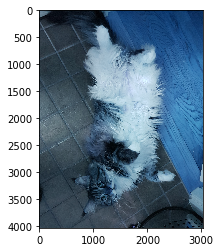

In [12]:
# reload the original image and convert it to grayscale
image = cv2.imread("example.png")
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
%%cython -a
import cython
import numpy as np


@cython.boundscheck(False)
cpdef unsigned char[:, :] cai_filter(int T, unsigned char [:, :] image):
    # set the variable extension types
    cdef int x, y, w, h
    cdef char cai_array[4]
    
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image
    for y in range(1, h):
        for x in range(1, w):
            # calculate the pixel
            n = y-1
            e = x+1
            s = y+1
            w = x-1
            cai_array = [n, s, e, w]

            if np.max(cai_array) - np.min(cai_array) <= 20:
                px = np.mean(cai_array)
            elif np.absolute(e - w) - np.absolute(n - s) > 20:
                px = (n+s)/2
            elif np.absolute(n - s) - np.absolute(e - w)> 20:
                px = (e+w)/2
            else:
                px = np.median(cai_array)
            image[y, x] = px
    # return the thresholded image
    return image

DistutilsPlatformError: Unable to find vcvarsall.bat

In [ ]:
%timeit cai_filter(5, image)
image = cai_filter(5, image)
plt.imshow(image, cmap="gray")